[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tuankhoin/COMP30027-Practical-Solutions/blob/main/2023/Week%209.ipynb)

###### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2023

## Week 9 - Text Processing & Feature Selection

---

## Theoretical Questions

### 1. We are doing some feature selection today

| ID | Outl | Temp | Humi | Wind | Play |
|----|------|------|------|------|------|
| A  | s    | h    | h    | F    | N    |
| B  | s    | h    | h    | T    | N    |
| C  | o    | h    | h    | F    | Y    |
| D  | r    | m    | h    | F    | Y    |
| E  | r    | c    | n    | F    | Y    |
| F  | r    | c    | n    | T    | N    |

#### (i). Which of `Humi=h` and `Wind=T` has the greatest Pointwise Mutual Information for the class Y? What about N?

Remember, for binary attributes: $PMI(A,C) = log_2\frac{P(A \cap C)}{P(A)P(C)}$

So: 
- $PMI(Humi=h, Play=Y) = log_2\frac{2/6}{4/6 \times 3/6} = log_2 1 = 0 $
- $PMI(Wind=T, Play=Y) = log_2\frac{0}{2/6 \times 3/6} = log_2 0 = -∞ $

With `PLAY=T`, `Wind` is (perfectly) negatively correlated, whereas `Humi` is (perfectly) uncorrelated.

#### (ii). Which of the attributes has the greatest Mutual Information for the class, as a whole?

MI formula: $MI(X,C) = \sum_{x,c} P(x,c)PMI(x,c)$, where $0\times log(0)=0$

$MI(Outl) \\= \sum_{x \in \{s,o,r\},\; c \in \{Y,N\}} P(x,c)PMI(x,c) \\= \sum_{x \in \{s,o,r\},\; c \in \{Y,N\}} P(x,c) log_2\frac{P(x,c)}{P(x)P(c)} = ... = 0.541 $

Similar way, you will get:
- MI(Temp) = 0.11
- MI(Humi) = 0
- MI(Wind) = 0.459

### 2. How is Logistic Regression similar to Naive Bayes and how is it different? In what circumstances would the former be preferable, and in what circumstances would the latter?

Similarity:
- Supervised Classifiers
- Attempt to predict using probability (Maximum Likelihood Estimation - MLE)

Dissimilarity:
- Conditional probability P(y|x): 
  - NB estimate with Bayes rule and independence assumption.
  - LR directly model, maximise through optimization.
- Generative/Discrimiative (You'll know more in GANs - Week 12):
  - NB tries to learn overall how a class looks like.
  - LR only tries to distinguish between classes.

Preference:
- LR: better performance due to no independence assumption. But more complex.
- NB: simpler, quicker

### 3. What is the difference between "bias" and “variance”?
- Bias: systematically produce same errors
- Variance: produce different results under the same training data characteristics, showing inconsistencies

#### (i). Why is a high bias, low variance classifier undesirable?
It will repeat the same mistakes all the time.

#### (ii). Why is a low bias, high variance classifier (usually) undesirable?
- Hard to be certain about the true performance
- Tend to change decisions much easier upon alteration of training data


### 4. Describe how validation set, and cross-validation can help reduce overfitting?

- Training accuracy is not a good indicator of performance on unseen data.
- Can take out some of the data to use for validation.
- One-time partition results may be noisy or biased, so cross validation will be better!

### 5. Why ensembling reduces model variance?

Remember your stats: with $Z$ being random variable, $Var(\frac{1}{N}\sum_i Z_i) = \frac{1}{N} Var(Z_i)$

So variance will decrease when several models are averaged. But we only have 1 training data ▶ Ensemble time!

### 6. Select the most appropriate term from the `???` in the test above.
> Suppose you are given a dataset generate based on the following model $ y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3$. You intend to fit a regression model to this data. If your regression model involves polynomial term up to $x^2$, it may have `???` bias and `???` variance. 

Hint: `???` is either one of 'high' or 'low'

**Answer**: Your model is underfitting ▶ it may have `high` bias and `low` variance

### 7. Explain the difference between “evaluation bias” and “model bias”.

Model bias:
- Wrong results due to model (architecture, feature selection, assumptions) ▶ Likely to underfit

Evaluation bias:
- Systematic error during evaluation causing consistent error when estimating model performance, due to the evaluation metric used (choice, sampling bias, assumptions) ▶ Likely to have good performance when training but bad when testing

### 8. During training process, your model shows significantly different performance across different training sets. 

#### (a) What can be the reason? 
Overfitting, high variance

#### (b) How can we solve the issue?
- More data
- Reduce features
- Regularisation
- Remove noise if possible

---
## Coding Exercises

Today, we are talking about feature selection and text processing using in `scikit learn`. 

Remeber you can always use the [Scikit Learn API](https://scikit-learn.org/stable/modules/classes.html#) for further exampes and explanation.

What you may want to look at for the Assignment:
- How `CountVectorizer()` works
- `sklearn` Feature Selection


Today, we are talking about feature selection and using Scikit-learn in-built text dataset, the “20 newsgroups corpus”, which contains a number of documents classified with a topic, based on the newsgroup in which it was posted. 
The <a href=https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html#sklearn.datasets.fetch_20newsgroups> "`sklearn.datasets.fetch_20newsgroups`"</a> function is a data fetching / caching functions that downloads the data archive from the original <a href="http://people.csail.mit.edu/jrennie/20Newsgroups/"> 20 newsgroups website</a>, extracts the archive contents in the `~/scikit_learn_data/20news_home` folder and calls the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_files.html#sklearn.datasets.load_files"> `sklearn.datasets.load_files` </a> on either the training or testing set folder, or both of them:

In [ ]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

print('\n'.join([n for n in fetch_20newsgroups(subset='train').target_names]))

alt.atheism
comp.graphics
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.sys.mac.hardware
comp.windows.x
misc.forsale
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey
sci.crypt
sci.electronics
sci.med
sci.space
soc.religion.christian
talk.politics.guns
talk.politics.mideast
talk.politics.misc
talk.religion.misc


## Exercise 1. 
Choose a couple of newsgroups that you think it would be interesting to discriminate between, like `rec.autos` and `rec.motorcycles`.

We will use `alt.atheism` and `talk.religion.misc` as an example.

In [ ]:
categories = ['alt.atheism','talk.religion.misc']

data_train = fetch_20newsgroups(subset='train', categories=categories,
shuffle=True, random_state=30027)
data_test = fetch_20newsgroups(subset='test', categories=categories,
shuffle=True, random_state=30027)

X_train_txt = data_train.data
y_train = data_train.target
X_test_txt = data_test.data
y_test = data_test.target

print(dir(data_train))

['DESCR', 'data', 'filenames', 'target', 'target_names']


Examine a couple of documents, by referencing the list ( `X_train[0]` ). Can you accurately predict the class ( `y_train[0]` ) based on the text alone?

In [ ]:
print(X_train_txt[0])
print(f'label is {y_train[0]} = {data_train.target_names[y_train[0]]}')

From: acooper@mac.cc.macalstr.edu
Subject: Re: Where are they now?
Organization: Macalester College
Lines: 38

In article <1qi156INNf9n@senator-bedfellow.MIT.EDU>, tcbruno@athena.mit.edu (Tom Bruno) writes:
> 
> Wow.  Leave your terminal for a few months and everyone you remember goes
> away-- how depressing.  Actually, there are a few familiar faces out there,
> counting Bob and Kent, but I don't seem to recognize anyone else.  Has anyone
> heard from Graham Matthews recently, or has he gotten his degree and sailed
> for Greener Pastures (tm)?  
> 
> Which brings me to the point of my posting.  How many people out there have 
> been around alt.atheism since 1990?  I've done my damnedest to stay on top of
> the newsgroup, but when you fall behind, you REALLY fall behind (it's still not
> as bad as rec.arts.startrek used to be, but I digress).  Has anyone tried to
> keep up with the deluge?  Inquiring minds want to know!  Also-- does anyone
> keep track of where the more infamous poster

Wanna try something?

(-0.5, 399.5, 199.5, -0.5)

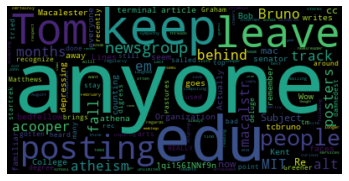

In [ ]:
import matplotlib.pyplot as plt
import wordcloud

wc = wordcloud.WordCloud().generate(X_train_txt[0])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

## Exercise 2
The document is currently a string, which scikit-learn can’t use directly. In order to feed predictive models with the text data, one first need to turn the text into vectors of numerical values suitable for statistical analysis. This can be achieved with the utilities of the `sklearn.feature_extraction.text`

### Exercise 2.(a)
The class `DictVectorizer` can be used to convert feature arrays represented as lists of standard Python dict objects to the NumPy/Pandas representation used by scikit-learn estimators.

`DictVectorizer` implements what is called one-of-K or “one-hot” coding for categorical. Recall that, in this method we replace each categorical attribute having m values with m binary attributes

Refresh your knowledge about one-hot encoding and other possible discritisation methods in week 3 and extract the words (or tokens) in the text and count them by using `CountVectorizer` to build a dictionary which associates each word (token) in a text document with its frequency in that document.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectoriser = CountVectorizer()
X_train = pd.DataFrame(vectoriser.fit_transform(X_train_txt).todense())
X_test = pd.DataFrame(vectoriser.transform(X_test_txt).todense())

#### Question

what is the difference between `transform` and `fit_transform` function?

#### Answer

`fit_transform()` is used to learn the vocabulary of the text data (i.e., the set of unique words that appear in the data) and transform the text data into a matrix of numerical features based on this vocabulary. This vocabulary is stored in the vectorizer's internal state and can be used to transform new text data with the same vocabulary. 

On the other hand, `transform()` is used to apply the vectorizer that has already been fit to new text data. The vocabulary is already learned from the training data using fit_transform(), and transform() uses this vocabulary to transform new text data into numerical features based on the learned vocabulary. 

In [ ]:
# Does the working mechanism (no appearance = 0 count) remind you of something familiar?
from collections import defaultdict, Counter
Counter([420,420,420,420])[69]

0

### Exercise 2.(b)
After “vectorizing” the data, what is the shape of `X_train` and `X_test`?

```python
print("Number of instances in X_train ",..., "   Number of features in X_train", ..., 
      "\n Number of instances in X_test",..., "  Number of features in X_test", ...)
```

In [ ]:
print("Number of instances in X_train ",X_train.shape[0], "   Number of features in X_train", X_train.shape[1], 
      "\nNumber of instances in X_test",X_test.shape[0], "     Number of features in X_test", X_test.shape[1])

Number of instances in X_train  857    Number of features in X_train 18089 
Number of instances in X_test 570      Number of features in X_test 18089


#### Exercise 2.(c)
Are there any documents in `X_test` whose values are all 0? Why might this happen?

In [ ]:
"Yes" if (X_test.sum(axis=1)==0).any() else "No"

'No'

*This is hypothetically possible - if every word in one of the test documents had never appeared in the training data. For long documents, this is exceedingly unlikely due to the appearance of grammatical "words" such as _the_, _is_, and so on.*

### Exercise 3
Now that we have "vectorised" our text, we want to choose the **best** attributes.

Feature Selection in `scikit-learn` can be done using `SelectKBest`.

Also FYI: `SelectPercentage` is another one that works the same way!

#### Exercise 3.(a)
Find out what the best 10 features were for your dataset, according to $\chi^2$ .

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

x2 = SelectKBest(chi2, k=10)

X_train_x2 = x2.fit_transform(X_train,y_train)
X_test_x2 = x2.transform(X_test)

for feat_num in x2.get_support(indices=True):
    print(vectoriser.get_feature_names_out()[feat_num])

atheism
atheist
atheists
brian
caltech
christ
islamic
jesus
keith
ra


Do they correspond to your intuitions? Is there any evidence of the biases inherent in $\chi^2$? What if you look at deeper than 10?

**Answer**

*These seem like words that could be relevant to trying to distinguish between a religious discussion vs an atheist discuss.*

*Perhaps surprising are words like _brian_, _keith_, and _caltech_, which are indicative of people who post to this forum (and perhaps not of the problem more generally). It's difficult to determine the rare/common distinction here, but it becomes a little clearer as we look further down the ranking.*

#### Exercise 3.(b)
Do the same thing for Mutual Information, instead of $\chi^2$ (note that you want the classification version, not the regression version).


```python
from sklearn.feature_selection import mutual_info_classif

mi = SelectKBest(score_func=..., k=10)
X_train_mi = ...
X_test_mi = ...
```

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mi = SelectKBest(score_func=mutual_info_classif, k=10)
X_train_mi = mi.fit_transform(X_train,y_train)
X_test_mi = mi.transform(X_test)

print(X_test_mi.shape, X_train_mi.shape)

for feat_num in mi.get_support(indices=True):
    print(vectoriser.get_feature_names_out()[feat_num])

(570, 10) (857, 10)
7e4
ascertainable
atheists
caltech
casteth
cco
exceptional
keith
schneider
technology


**Answer**

Here we see more evidence of MI choosing frequently-occuring features, such as **it**, **of** and **the**.

### Exercise 4. 
Build a classifier on the training dataset, and evaluate its Accuracy on the test set. 
#### Exercise 4.(a) 
It’s likely that the dataset is still small enough that you can build a model on the entire feature set (after the CountVectorizer, but before the SelectKBest) without crashing your computer. How well do these models predict the test data, using all of the features?

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

models = [GaussianNB(),
          MultinomialNB(),
          KNeighborsClassifier(n_neighbors=5),
          DecisionTreeClassifier(max_depth=None,random_state=27),
          LogisticRegression(max_iter = 1000),
          SVC(kernel='poly', degree=3)]
titles = ['GNB',
          'MNB',
          '5-nearest neighbour',
          'Decision Tree',
          'Logistic Regression',
          'SVM with a cubic kernel']

for title, model in zip(titles, models):
    model.fit(X_train, y_train)
    y_test_predict = model.predict(X_test)
    accuracy =  accuracy_score(y_test, y_test_predict)
    print(title, 'accuracy is:',  accuracy)

GNB accuracy is: 0.8333333333333334
MNB accuracy is: 0.8456140350877193
5-nearest neighbour accuracy is: 0.6578947368421053
Decision Tree accuracy is: 0.8210526315789474
Logistic Regression accuracy is: 0.7964912280701755
SVM with a cubic kernel accuracy is: 0.5719298245614035


#### Exercise 4.(b)  
Now let's use our selected features and see if the feature selection would benefit the performance of our classifiers.

Try some different values for the cut-off for `SelectKBest` — is it possible to improve upon the Accuracy observed for the models which use the entire feature set? Is this more true for some learners than others? Does your choice between χ2 and Mutual Information make a difference?

```python
for k in [10,100,1000]:
    x2 = SelectKBest(chi2, k=k)
    x2.fit(X_train,y_train)
    X_train_x2 = ...
    X_test_x2 = ...


    mi = SelectKBest(score_func=mutual_info_classif, k=k)
    mi.fit(X_train,y_train)
    X_train_mi = ...
    X_test_mi = ...
```

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import pandas as pd
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')


models = [GaussianNB(),
          MultinomialNB(),
          DecisionTreeClassifier(max_depth=1),
          KNeighborsClassifier(n_neighbors=5),
          DecisionTreeClassifier(max_depth=None),
          LogisticRegression(max_iter = 1000),
          SVC(kernel='rbf', gamma=0.7),
          SVC(kernel='poly', degree=3)]
titles = ['GNB',
          'MNB',
          '1R',
          '5-NN',
          'Decision Tree',
          'Logistic Regression',
          'SVM (Cubic kernel)',
          'SVM (RBF kernel)']

X_names = ['Full Set', 'Chi2', 'MI']
ks = [10,100,1000,10000]

df = pd.DataFrame(index=titles,
                  columns=pd.MultiIndex.from_product([ks,X_names],
                                                     names=['n_features','Criteria']))
for k in tqdm(ks):
    #print(f'\n' + '-'*30 + f'K = {k}' + '-'*30)
    x2 = SelectKBest(chi2, k=k)
    x2.fit(X_train,y_train)
    X_train_x2 = x2.transform(X_train)
    X_test_x2 = x2.transform(X_test)

    mi = SelectKBest(score_func=mutual_info_classif, k=k)
    mi.fit(X_train,y_train)
    X_train_mi = mi.transform(X_train)
    X_test_mi = mi.transform(X_test)

    Xs = [(X_train, X_test), (X_train_x2, X_test_x2), (X_train_mi, X_test_mi)]
    for title, model in zip(titles, models):
        #print('\n=========',title, '(with k=',k,'features): ')
        for X_name, X in zip(X_names, Xs):
            X_train_t, X_test_t = X
            model.fit(X_train_t.todense(), y_train)
            y_test_predict = model.predict(X_test_t.todense())
            accuracy =  accuracy_score(y_test, y_test_predict)
            #print(X_name, 'accuracy is:',  accuracy)  
            df.loc[title,(k,X_name)] = accuracy
df

100%|██████████| 4/4 [06:07<00:00, 91.98s/it] 


n_features              10                            100              \
Criteria             Full Set      Chi2        MI  Full Set      Chi2   
GNB                  0.833333  0.668421  0.540351  0.833333  0.726316   
MNB                  0.845614  0.649123  0.614035  0.845614  0.740351   
1R                   0.564912  0.564912  0.564912  0.564912  0.564912   
5-NN                 0.657895  0.670175  0.559649  0.657895  0.622807   
Decision Tree        0.792982  0.670175  0.584211  0.796491  0.729825   
Logistic Regression  0.796491  0.685965  0.617544  0.796491  0.747368   
SVM (Cubic kernel)   0.559649  0.659649  0.610526  0.559649  0.568421   
SVM (RBF kernel)      0.57193  0.584211   0.55614   0.57193  0.578947   

n_features                        1000                          10000  \
Criteria                   MI  Full Set      Chi2        MI  Full Set   
GNB                  0.645614  0.833333  0.822807  0.807018  0.833333   
MNB                  0.719298  0.845614  0.826316  0.814035  0.845614   
1R                   0.564912  0.564912  0.564912  0.564912  0.564912   
5-NN                 0.587719  0.657895  0.649123  0.601754  0.657895   
Decision Tree        0.705263  0.796491  0.794737  0.785965  0.807018   
Logistic Regression  0.719298  0.796491  0.801754  0.789474  0.796491   
SVM (Cubic kernel)   0.563158  0.559649  0.559649  0.559649  0.559649   
SVM (RBF kernel)     0.577193   0.57193  0.578947  0.573684   0.57193   

n_features                               
Criteria                 Chi2        MI  
GNB                  0.824561  0.821053  
MNB                  0.847368  0.840351  
1R                   0.564912  0.564912  
5-NN                 0.663158  0.654386  
Decision Tree        0.789474  0.805263  
Logistic Regression  0.801754  0.801754  
SVM (Cubic kernel)   0.559649  0.559649  
SVM (RBF kernel)     0.568421   0.57193

### Exercise 5

Other than Mutual Information and χ2 we learnt about wrapping methods for feature selection. Wrapping methods for feature selection involve selecting subsets of features based on how well they perform when used with a particular machine learning algorithm. The idea behind wrapping methods is to train a machine learning model on different subsets of features, and evaluate their performance using cross-validation or other methods.

In order to make the wrapper method feasible we need to rediuce the size of the features. Let's select a subset of features using the TFIDF (term frequency inverse document frequency) approach. Identify the 50 most informative features for your data set.

- `stop_words='english'` removes all function words (articles, pronounds, ...) from the vocabulary before TFIDF filtering. Test what happens if you sent this feature to **False**
- Experiment with different values for max_features

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=50, stop_words='english')

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_txt)
X_test_tfidf = tfidf_vectorizer.transform(X_test_txt)

print(X_train_tfidf.shape, X_test_tfidf.shape)
print(tfidf_vectorizer.get_feature_names_out())

(857, 50) (570, 50)
['argument' 'article' 'atheism' 'atheists' 'believe' 'bible' 'christian'
 'com' 'did' 'does' 'don' 'edu' 'evidence' 'fact' 'god' 'good' 'host'
 'islam' 'jesus' 'just' 'keith' 'know' 'law' 'life' 'like' 'lines' 'make'
 'moral' 'morality' 'nntp' 'objective' 'organization' 'people' 'point'
 'posting' 'really' 'religion' 'right' 'said' 'sandvik' 'say' 'subject'
 'things' 'think' 'time' 'true' 'university' 'way' 'world' 'writes']


In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

knn = KNeighborsClassifier(n_neighbors=3)
nb = MultinomialNB()

sfs_knn = SequentialFeatureSelector(knn, direction='forward', n_features_to_select=10, cv=2)
sfs_nb = SequentialFeatureSelector(nb, direction='forward', n_features_to_select=10, cv=2)

sfs_features = {}

modelnames = ['knn', 'nb']
for idx, sfs in enumerate([sfs_knn, sfs_nb]):
    
    X_train_sfs = sfs.fit_transform(X_train_tfidf,y_train)
    X_test_sfs = sfs.transform(X_test_tfidf)
    
    sfs_features[modelnames[idx]] = [X_train_sfs, X_test_sfs]

    print(modelnames[idx], [tfidf_vectorizer.get_feature_names_out()[i] for i in sfs.get_support(indices=True)])

knn ['atheism', 'atheists', 'christian', 'did', 'good', 'islam', 'jesus', 'just', 'make', 'subject']
nb ['argument', 'bible', 'christian', 'evidence', 'jesus', 'just', 'keith', 'objective', 'really', 'sandvik']
